In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### load and preprocessing data

In [2]:
train_data = pd.read_csv('train.csv')

train_data = train_data.replace(['female', 'male'], [0, 1])
train_data = train_data.replace(['S', 'C', 'Q'], [0, 1, 2])
train_data = train_data.fillna(0)

Y_train = train_data[['Survived']]
print(Y_train.shape)

X_train = train_data[['Pclass', 'Sex', 'Fare', 'Age', 'SibSp', 'Parch', 'Embarked']]

Y_train = np.array(Y_train)
Y_train = Y_train.reshape(-1)
X_train = np.array(X_train)

(891, 1)


In [3]:
test_data = pd.read_csv('test.csv')

test_data = test_data.replace(['female', 'male'], [0, 1])
test_data = test_data.replace(['S', 'C', 'Q'], [0, 1, 2])
test_data = test_data.fillna(0)

X_test = test_data[['Pclass', 'Sex', 'Fare', 'Age', 'SibSp', 'Parch', 'Embarked']]

test_label = pd.read_csv('gender_submission.csv')
Y_test = test_label[['Survived']]

Y_test = np.array(Y_test)
Y_test = Y_test.reshape(-1)
print(Y_test.reshape(-1).shape)
X_test = np.array(X_test)

(418,)


### Perceptron class, fit, predict and evaluation

In [4]:
class Perceptron:
    def __init__(self):
        pass
    
    def fit(self, itr, X_tarin, Y_tarin):
        self.w = np.random.rand(7)
#         print(self.w)
        self.b = np.random.rand(1)
        lr = 0.000001
        MAE = []
        MSE = []

        for j in range(itr):
            mae = []
            mse = []

            for i in range(X_train.shape[0]):
                x_train = X_train[i].reshape(1,-1)
                y_pred = np.matmul(x_train, self.w ) + self.b

                e = Y_train[i] - y_pred
                
                self.w = self.w  + e * lr * X_train[i]
                self.b = self.b + e * lr * 1
         
                mae.append(np.abs(e))
                mse.append(np.square(e))

            MAE.append(np.mean(mae))
            MSE.append(np.mean(mse))
        
        np.save('w', self.w)
        np.save('b', self.b)
        return MAE, MSE

    def predict(self, X_test):
        w = np.load('w.npy')
        b = np.load('b.npy')
        Y_pred = np.matmul(X_test, w) + b
        Y_pred[Y_pred > 0.5] = 1
        Y_pred[Y_pred <= 0.5] = 0

        return Y_pred

    def evaluate(self, X_test, Y_test):
        w = np.load('w.npy')
        b = np.load('b.npy')
        Y_pred = np.matmul(X_test, w) + b
        
        Y_pred[Y_pred > 0.5] = 1
        Y_pred[Y_pred <= 0.5] = 0
    
        accuracy = np.count_nonzero(Y_pred == Y_test) / len(Y_test) * 100
                                 
        return accuracy

In [15]:
# train

itration = 5
model = Perceptron()
MAE, MSE = model.fit(itration, X_train, Y_train)
print('MAE in end of train: ', np.min(MAE), '\nMSE in end of train:', np.min(MSE))
# print(model.w)

MAE in end of train:  2.6211897157274953 
MSE in end of train: 9.532872313644846


Text(0.5, 1.0, 'MAE during Training')

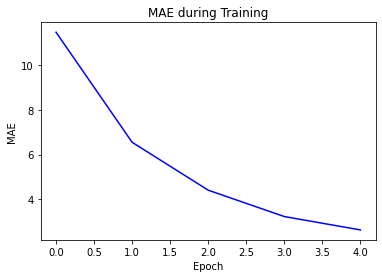

In [16]:
plt.plot((np.arange(len(MAE))), MAE, c = 'b')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('MAE during Training')

Text(0.5, 1.0, 'MSE during Training')

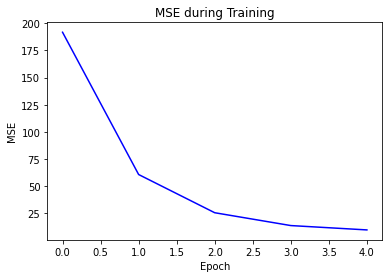

In [17]:
plt.plot(MSE, c = 'b')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE during Training')

In [19]:
Y_pred = model.predict(X_test)
print(Y_pred)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.

In [20]:
evaluate = model.evaluate(X_test, Y_test)
print('accuracy on X_test :', evaluate)

accuracy on X_test : 34.21052631578947
